<a href="https://colab.research.google.com/github/Nazneen-akram/NED-DL-Assignments/blob/main/Assignment_2_CNN_wrong_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os, pathlib
import numpy as np

import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Input, Sequential

import matplotlib.pyplot as plt
import seaborn as sns

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

-- from Kaggle

In [ ]:
from google.colab import files
files.upload()    # you will chose file for your kaggle.json, downloaded from laggle/settings

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazneenakram","key":"08d579900181a0e53c4bac39e23b069d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle competitions download -c dogs-vs-cats
#!kaggle datasets download -d cdart99/food20dataset
!kaggle datasets download -d carlosrunner/pizza-not-pizza

 99% 100M/101M [00:05<00:00, 27.4MB/s] 
100% 101M/101M [00:05<00:00, 17.6MB/s]


The Data Extraction

In [ ]:
!unzip pizza-not-pizza.zip

Archive:  pizza-not-pizza.zip
  inflating: pizza_not_pizza/food101_subset.py  
  inflating: pizza_not_pizza/not_pizza/1005746.jpg  
  inflating: pizza_not_pizza/not_pizza/1009225.jpg  
  inflating: pizza_not_pizza/not_pizza/1012312.jpg  
  inflating: pizza_not_pizza/not_pizza/1018802.jpg  
  inflating: pizza_not_pizza/not_pizza/1020735.jpg  
  inflating: pizza_not_pizza/not_pizza/1027142.jpg  
  inflating: pizza_not_pizza/not_pizza/102839.jpg  
  inflating: pizza_not_pizza/not_pizza/1043233.jpg  
  inflating: pizza_not_pizza/not_pizza/1045400.jpg  
  inflating: pizza_not_pizza/not_pizza/104773.jpg  
  inflating: pizza_not_pizza/not_pizza/1050956.jpg  
  inflating: pizza_not_pizza/not_pizza/1054362.jpg  
  inflating: pizza_not_pizza/not_pizza/1062097.jpg  
  inflating: pizza_not_pizza/not_pizza/1066151.jpg  
  inflating: pizza_not_pizza/not_pizza/1070772.jpg  
  inflating: pizza_not_pizza/not_pizza/1070867.jpg  
  inflating: pizza_not_pizza/not_pizza/107499.jpg  
  inflating: pizza_not_

In [ ]:
#!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [92]:
# Define the directories
# Define the directories
pizza_dir = pathlib.Path('pizza')
not_pizza_dir = pathlib.Path('not_pizza')
data_dir=pathlib.Path('pizza_not_pizza')

In [105]:
class_names = []
for f in data_dir.rglob('*'):
  if f.is_dir():
    class_names.append(str(f).rsplit('/')[-1])
class_names

['pizza', 'not_pizza']

In [100]:
pizza_dir = data_dir / 'pizza'
not_pizza_dir = data_dir / 'not_pizza'

# Count the number of files (i.e., images) in each directory
pizza_count = len(list(pizza_dir.glob('*')))
not_pizza_count = len(list(not_pizza_dir.glob('*')))


print(f"There are {pizza_count} pizza images and {not_pizza_count} not pizza images.")

There are 983 pizza images and 983 not pizza images.


### Data Visualisation

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [109]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_ds = data_gen.flow_from_directory(data_dir,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary',
                                          classes=['pizza', 'not_pizza']
                                          )
valid_ds = data_gen.flow_from_directory(data_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary',
                                        classes=['pizza', 'not_pizza'])

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


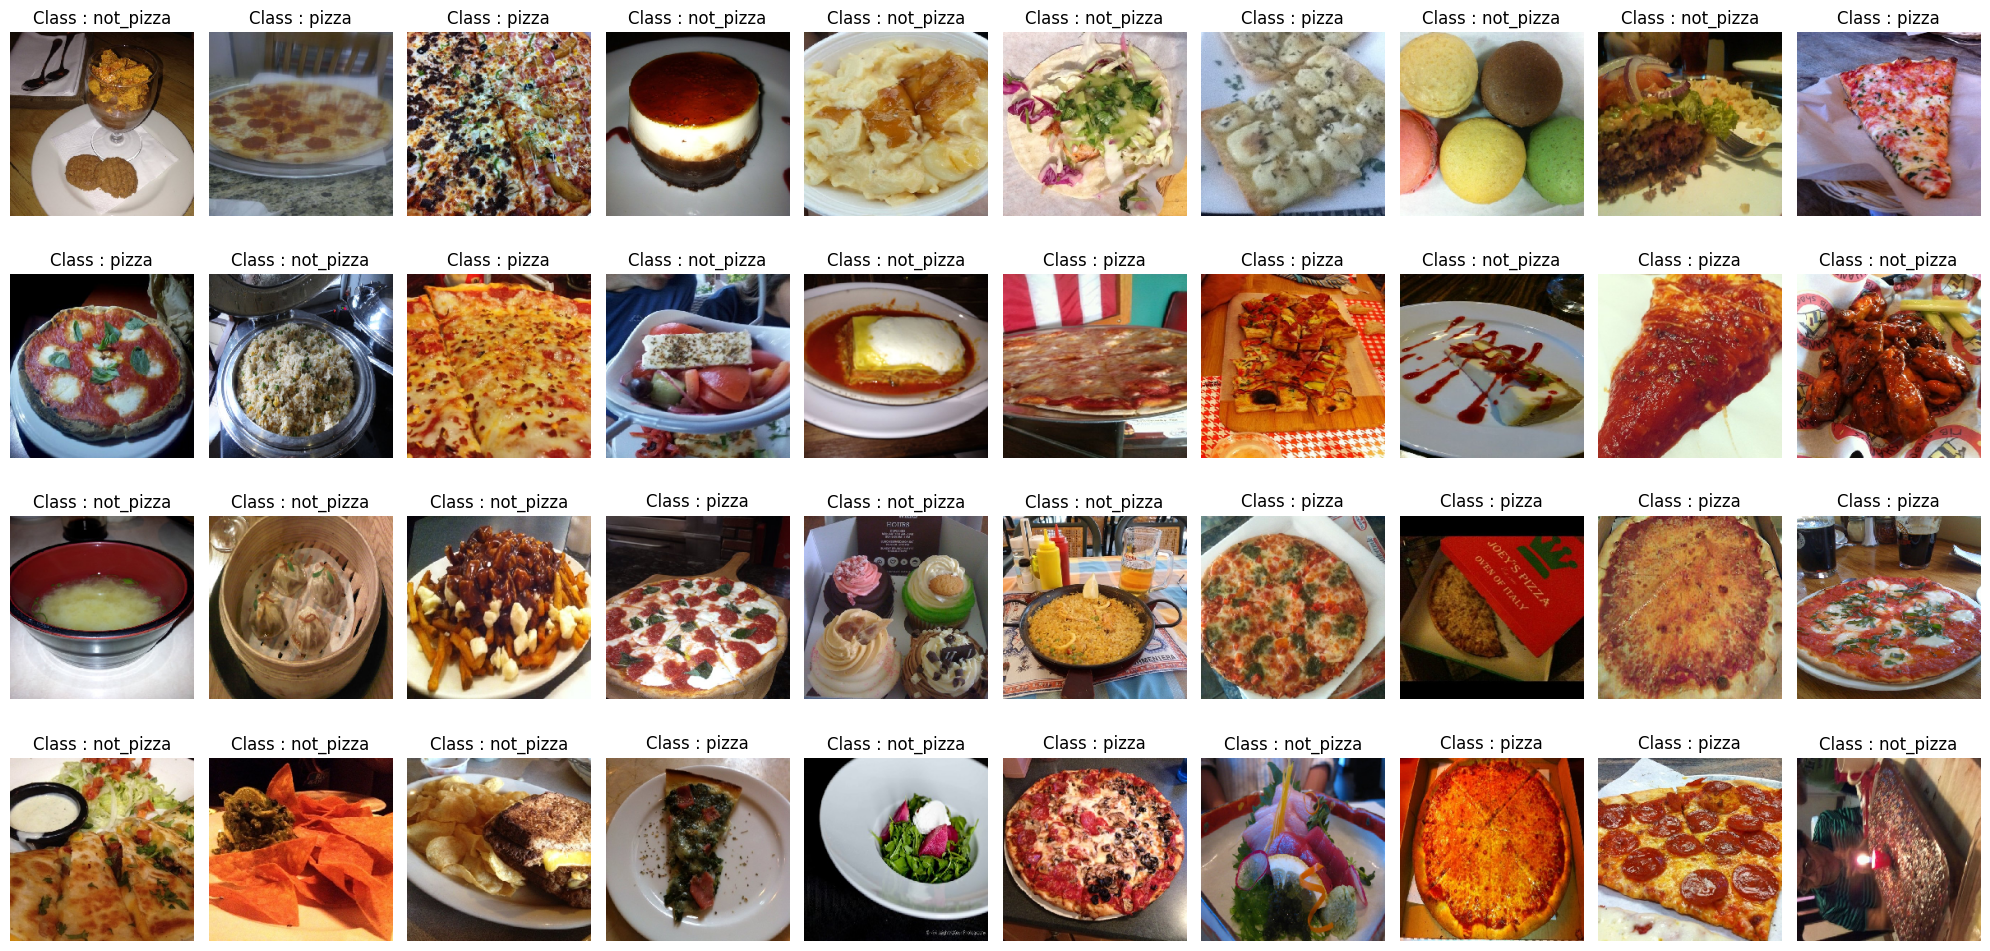

In [110]:
i=1
plt.figure(figsize=(20,10))
for images, labels in train_ds:

    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])

    plt.subplot(4,10,i)
    plt.imshow(image)
    plt.title(f"Class : {class_names[label]}")
    plt.axis('off')

    i+=1
    if i>=41:
        break
plt.tight_layout()
plt.show()

### Building the model

**Instantiating a small convnet for pizza vs. not pizza classification**

In [111]:
for data_batch, labels_batch in train_ds:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


In [ ]:
tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape = (224, 224, 3)), # Input layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # First Convolutional layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # Second Convolutional layer
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      4128      
                                                                 
 flatten (Flatten)           (None, 1577088)           0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1577089   
                                                                 
Total params: 1581633 (6.03 MB)
Trainable params: 1581633 (6.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Configuring the model for training**

In [ ]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Displaying the shapes of the data and labels yielded by the `Dataset`**

**Fitting the model using a `Dataset`**

In [ ]:
history_1 = model_1.fit(train_ds,
                        epochs= 5,
                        steps_per_epoch = len(train_ds),
                        validation_data = valid_ds,
                        validation_steps = len(valid_ds))

Epoch 1/5
50/50 [==============================] - 113s 2s/step - loss: 1.9956 - accuracy: 0.5165 - val_loss: 0.6709 - val_accuracy: 0.5306
Epoch 2/5
50/50 [==============================] - 121s 2s/step - loss: 0.6295 - accuracy: 0.6429 - val_loss: 0.6054 - val_accuracy: 0.7143
Epoch 3/5
50/50 [==============================] - 112s 2s/step - loss: 0.5144 - accuracy: 0.7598 - val_loss: 0.6478 - val_accuracy: 0.6964
Epoch 4/5
50/50 [==============================] - 112s 2s/step - loss: 0.3094 - accuracy: 0.8844 - val_loss: 0.6224 - val_accuracy: 0.6709
Epoch 5/5
50/50 [==============================] - 112s 2s/step - loss: 0.1219 - accuracy: 0.9733 - val_loss: 0.8424 - val_accuracy: 0.6020


**Displaying curves of loss and accuracy during training**

In [62]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

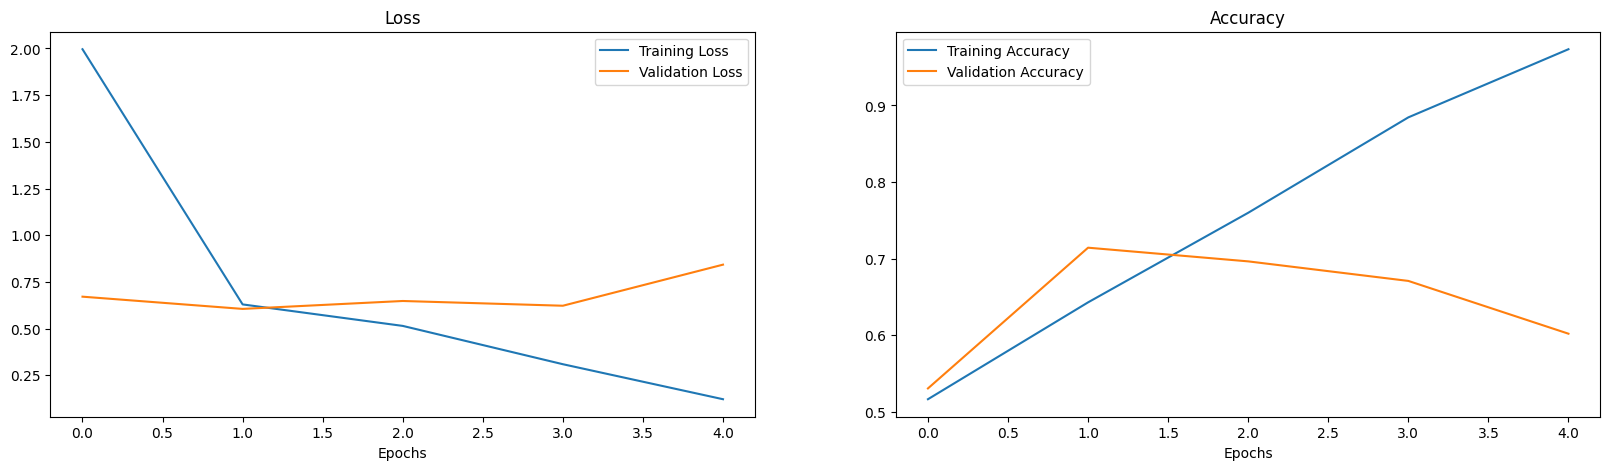

In [65]:
plot_loss_curves(history_1)

In [112]:
model_1.save('pizza_classification.keras')

In [113]:
from keras.saving import load_model

test_model = load_model('pizza_classification.keras')

**Evaluating the model on the test set**

In [114]:
test_loss, test_acc = test_model.evaluate(train_ds)
print(f"Test accuracy: {test_acc:.3f}")

50/50 [==============================] - 36s 697ms/step - loss: 4.2474 - accuracy: 0.0400
Test accuracy: 0.040


In [115]:
# Load an image file to test, resizing it to 224x224 pixels (as required by this model)
img = keras.preprocessing.image.load_img(train_ds, target_size=(224, 224))

# Convert the image to a numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Add a batch dimension
img_batch = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_preprocessed = img_batch / 255.0

# Make predictions
prediction = model_1.predict(img_preprocessed)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# The model returns a probability between 0 and 1
# You can convert this to the corresponding class label as follows:
if prediction[0] < 0.5:
    print("The predicted class is: pizza")
else:
    print("The predicted class is: not pizza")

# To display the actual class of the image, you need to have this information.
# If the filename or path of the image contains the class information, you can extract it as follows:
actual_class = "pizza" if "pizza" in train_ds else "not pizza"
print("The actual class is:", actual_class)


TypeError: ignored

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
cb_check_pointing = keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.tf",   # .keras gives error
        save_best_only=True,
        monitor="val_loss")

callbacks = [cb_check_pointing, cb_early_stop]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):

    all_features, all_labels = [], []

    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features,   val_labels   =  get_features_and_labels(validation_dataset)
test_features,  test_labels  =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.tf",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

**Plotting the results**

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.tf",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary